In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def process_data_from_txt(txt_files, image_root_dirs):
    class_count = {}
    image_dimensions = []

    for txt_file in txt_files:
        img_root = image_root_dirs[txt_files.index(txt_file)]
        with open(txt_file, "r") as file:
            for line in file:
                image_path, class_index = line.strip().split()
                class_index = int(class_index)
                
                # Count the occurrences of each class
                class_count[class_index] = class_count.get(class_index, 0) + 1
                # Get the image full path
                image_path = os.path.join(img_root, image_path)

                # Get the width and height of the image
                image = plt.imread(image_path)
                height, width, _ = image.shape
                image_dimensions.append((width, height))
    # Calculate the percentage of each class
    total_images = sum(class_count.values())
    class_percentages = [count / total_images * 100 for count in class_count.values()]
    return class_percentages, image_dimensions, class_count

In [6]:
txt_files_path = ["/data/its/vehicle_cls/vp3_202307_crop/annotations/annotations.txt",
                      "/data/its/vehicle_cls/202307_crop_ttp/annotations/annotations.txt"]
image_root_dirs = ["/data/its/vehicle_cls/vp3_202307_crop/",
                       "/data/its/vehicle_cls/202307_crop_ttp/images/"]

In [7]:
class_percentages, image_dimensions, class_count = process_data_from_txt(txt_files_path,image_root_dirs)

In [21]:
class_names = ['xe sedan', 'xe SUV', 'xe ban tai', 'xe tai nho', 
                 'xe tai lon', 'container', 'xe cau...', 
                 'xe 16', 'xe 29-32', 'xe 52' ]
# Remove class 3 "xe ba gac" because it don't have any image

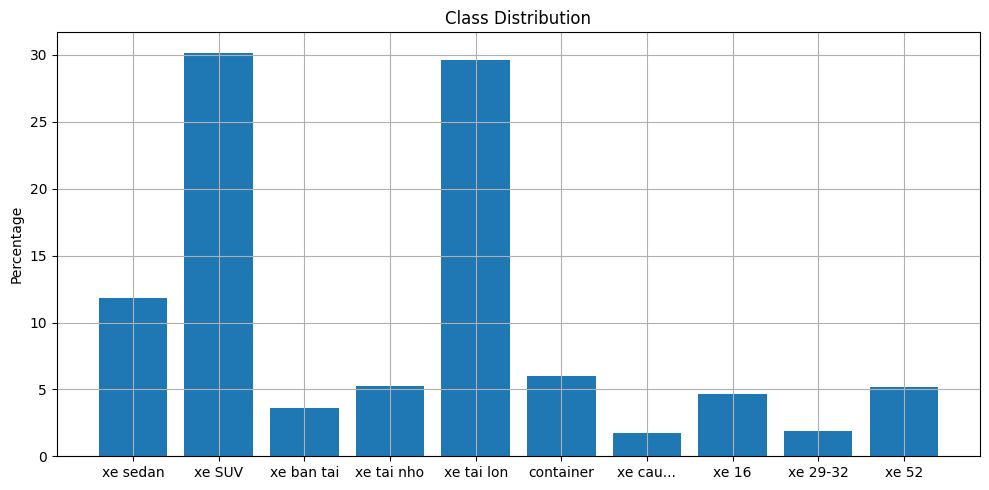

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_percentages)
plt.ylabel("Percentage")
plt.title("Class Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

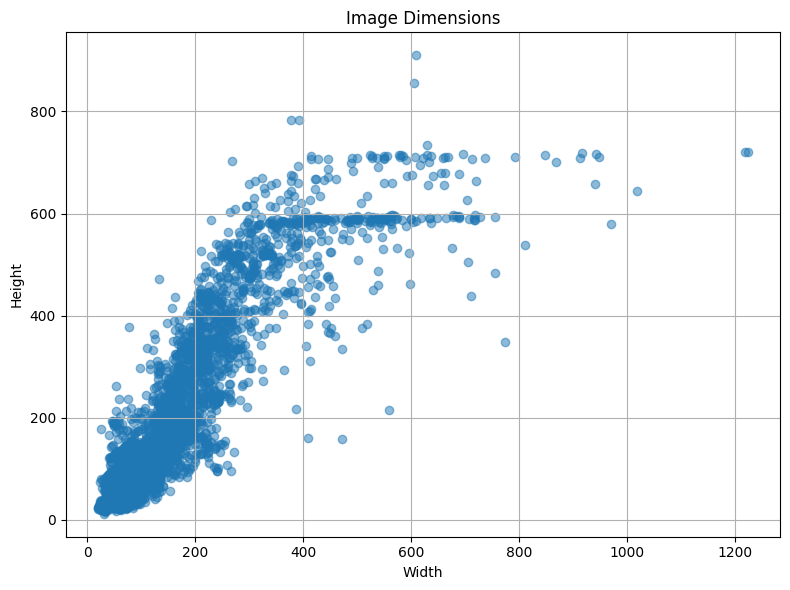

In [9]:
image_dimensions = np.array(image_dimensions)
plt.figure(figsize=(8, 6))
plt.scatter(image_dimensions[:, 0], image_dimensions[:, 1], alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Dimensions")
plt.grid(True)
plt.tight_layout()